In [358]:
import networkx as nx
import json
import numpy as np
import matplotlib.pyplot as plt

### README
Change Episode number variable to cycle through episodes. If you want to use the allepisodes variable to true.

In [359]:
episodeno=7
allepisodes = False
if allepisodes is not True:
    with open('star_wars_dataset/starwars-episode-%i-interactions-allCharacters.json' %episodeno) as f:
        js_graph1 = json.load(f)
        js_graph = nx.json_graph.node_link_graph(js_graph1)
        nx.write_graphml(js_graph, "./episode_%i.graphml" %episodeno)
else:
    with open('star_wars_dataset/starwars-full-interactions-allCharacters.json') as f:
        js_graph1 = json.load(f)
        js_graph = nx.json_graph.node_link_graph(js_graph1)
        nx.write_graphml(js_graph, "./all_episodes.graphml")

idToName = {}
cy = nx.json_graph.cytoscape_data(js_graph)
for i in cy["elements"]["nodes"]:
    idToName[i['data']['id']]=  i['data']['name']

### Calculating Betweenness Centrality

In [360]:
x = nx.betweenness_centrality(js_graph)
print (x)
for key,value in x.items():
    x[key]= [value,idToName[str(key)]]
print (x)

{0: 0.0373812798946585, 1: 0.061258184622169476, 2: 0.021405649295272746, 3: 0.03618396938427048, 4: 0.03958121144097958, 5: 0.0, 6: 0.005513981856696972, 7: 0.20527616510286287, 8: 0.00013650013650013648, 9: 0.0017147452762426017, 10: 8.19000819000819e-05, 11: 0.07460384397884799, 12: 0.0003022237113146204, 13: 0.00019532519532519533, 14: 0.03858670439341421, 15: 0.0, 16: 0.0, 17: 0.06812570259202824, 18: 0.0026865822841055033, 19: 0.0, 20: 0.158361912998823, 21: 0.0, 22: 0.0, 23: 0.00047407683771320136, 24: 0.16810394625192118, 25: 5.46000546000546e-05, 26: 0.0021266692425337694, 27: 0.00025213525213525214, 28: 0.0, 29: 0.025558540514755805, 30: 0.003109873536798236, 31: 0.0, 32: 0.002496639644523574, 33: 0.01834871406379167, 34: 0.03023348742595434, 35: 0.0, 36: 0.01893163134102719, 37: 0.0004737972919791101, 38: 0.0, 39: 0.0, 40: 0.0004458002639820824, 41: 0.0010874581649184, 42: 0.0, 43: 0.0, 44: 0.0, 45: 0.0, 46: 0.00023660023660023664, 47: 0.0, 48: 0.012943484086915348, 49: 0.00

In [361]:
#picking top 5
outx = dict(sorted(x.items(),key=lambda x: x[1], reverse=True)[0: 5])  
outx

{7: [0.20527616510286287, 'OBI-WAN'],
 24: [0.16810394625192118, 'C-3PO'],
 20: [0.158361912998823, 'ANAKIN'],
 67: [0.14168316245036236, 'LUKE'],
 73: [0.09639612279428685, 'HAN']}

### Calculating Degree Centrality

In [362]:
y = nx.degree_centrality(js_graph)
for key,value in y.items():
    y[key]= [value,idToName[str(key)]]
print (y)

{0: [0.2072072072072072, 'R2-D2'], 1: [0.17117117117117117, 'CHEWBACCA'], 2: [0.10810810810810811, 'BB-8'], 3: [0.24324324324324323, 'QUI-GON'], 4: [0.14414414414414414, 'NUTE GUNRAY'], 5: [0.018018018018018018, 'PK-4'], 6: [0.04504504504504504, 'TC-14'], 7: [0.3333333333333333, 'OBI-WAN'], 8: [0.02702702702702703, 'DOFINE'], 9: [0.036036036036036036, 'RUNE'], 10: [0.02702702702702703, 'TEY HOW'], 11: [0.2072072072072072, 'EMPEROR'], 12: [0.08108108108108109, 'CAPTAIN PANAKA'], 13: [0.07207207207207207, 'SIO BIBBLE'], 14: [0.21621621621621623, 'JAR JAR'], 15: [0.009009009009009009, 'TARPALS'], 16: [0.05405405405405406, 'BOSS NASS'], 17: [0.3063063063063063, 'PADME'], 18: [0.06306306306306306, 'RIC OLIE'], 19: [0.05405405405405406, 'WATTO'], 20: [0.3783783783783784, 'ANAKIN'], 21: [0.05405405405405406, 'SEBULBA'], 22: [0.02702702702702703, 'JIRA'], 23: [0.07207207207207207, 'SHMI'], 24: [0.32432432432432434, 'C-3PO'], 25: [0.036036036036036036, 'DARTH MAUL'], 26: [0.08108108108108109, '

In [363]:
#picking top 5
outy = dict(sorted(y.items(),key=lambda y: y[1], reverse=True)[0: 5])  
outy

{20: [0.3783783783783784, 'ANAKIN'],
 7: [0.3333333333333333, 'OBI-WAN'],
 24: [0.32432432432432434, 'C-3PO'],
 17: [0.3063063063063063, 'PADME'],
 3: [0.24324324324324323, 'QUI-GON']}

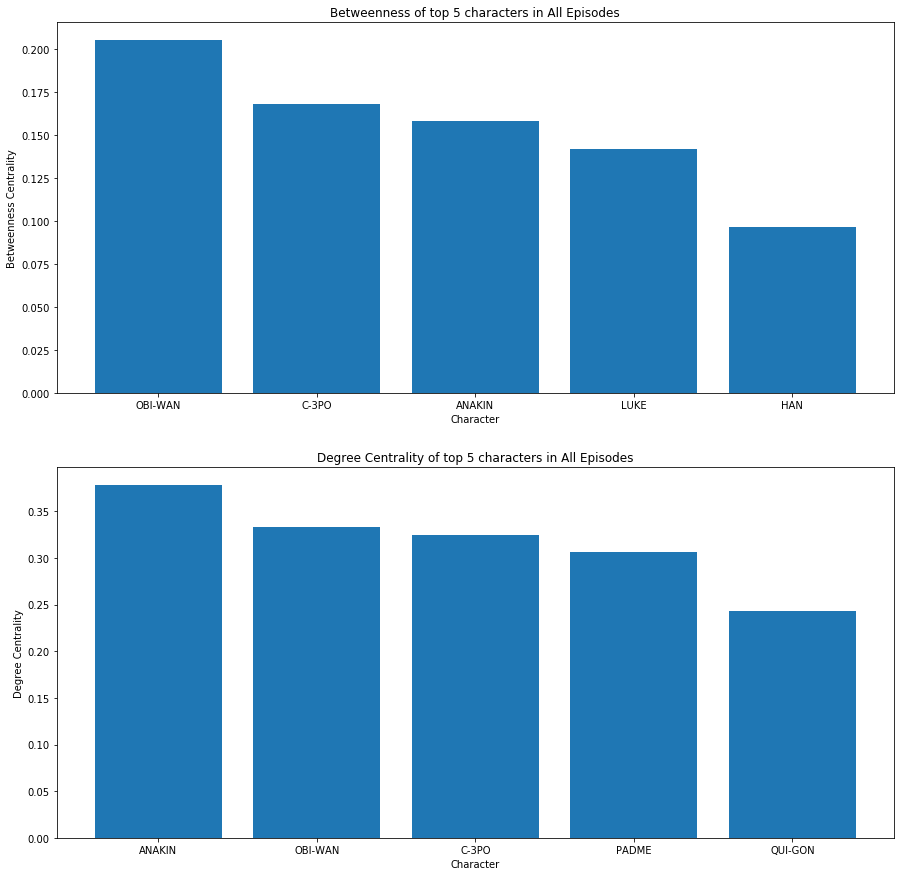

In [364]:
#m, b = np.polyfit(list(x), list(y), 1)
#print(m)

fig,a =  plt.subplots(2,1,figsize=(15,15))


a[0].bar([outx[k][1] for k in outx.keys()], [outx[k][0] for k in outx.keys()])
#plt.plot(list(x), m*np.array(list(x)) + b)

if allepisodes is not True:
    a[0].set_title("Betweenness of top 5 characters in Episode %i" %episodeno)
else:
    a[0].set_title("Betweenness of top 5 characters in All Episodes")
a[0].set_xlabel("Character")
a[0].set_ylabel("Betweenness Centrality")

a[1].bar([outy[k][1] for k in outy.keys()], [outy[k][0] for k in outy.keys()])
#plt.plot(list(x), m*np.array(list(x)) + b)
if allepisodes is not True:
    a[1].set_title("Degree Centrality of top 5 characters in Episode %i" %episodeno)
else:
    a[1].set_title("Degree Centrality of top 5 characters in All Episodes")
a[1].set_xlabel("Character")
a[1].set_ylabel("Degree Centrality")

if allepisodes is not True:
    plt.savefig("Episode_%i_betweenness.png" %episodeno)
else:
    plt.savefig("All_Episodes_betweenness.png")

In [365]:
#for line in nx.generate_edgelist(js_graph):
#    print(line) 